# (Legacy) demo1.ipynb

早期探索性 notebook（指标计算/可视化）。主要内容已可由 `fyp_trading/` 与 `strategy_*.ipynb` 复现。



In [ ]:
import yfinance as yf
import numpy as np

ticker = "2800.HK"
data = yf.download(ticker, start="2024-01-01", end="2025-10-01")
    

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf

In [ ]:
end_price = data["Close"].values.flatten()
volume = data['Volume'].values.flatten()
max = data['High'].values
low = data['Low'].values
print(max.max())
print(low.min())

print(np.average(end_price))

In [ ]:
print(np.average(end_price))
print(np.average(end_price, weights=volume))  #VAWP

In [ ]:
log_return = np.diff(np.log(end_price))


In [ ]:
annual_volatility = log_return.std()*np.sqrt(250)
annual_return = log_return.mean()*250
sharpe_ratio = annual_return/annual_volatility

In [ ]:
print(sharpe_ratio)

In [ ]:
N=5
weights = np.ones(N)/N
print(weights)
sma = np.convolve(weights, end_price)[N-1:-N+1]

In [ ]:
N=5
weights = np.exp(np.linspace(-1,0,N))
weights /= weights.sum()
print(weights)
ema = np.convolve(weights,end_price)[N-1:-N+1]


In [ ]:
t = np.arange(N-1, len(end_price))
plt.plot(t,end_price[N-1:], lw=1.0)
plt.plot(t,sma,lw=2.0)
plt.show()

In [ ]:
t = np.arange(N-1, len(end_price))
plt.plot(t,end_price[N-1:], lw=1.0)
plt.plot(t,ema,lw=2.0)
plt.show()

In [ ]:
print(data.index)

In [ ]:
data['date'] = pd.to_datetime(data.index)
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month


In [ ]:
print(data.groupby("month")["Close"].mean())
print(data.groupby("month")["Open"].mean())

In [ ]:
# 明确指定使用哪个 ticker 的数据
data["rise"] = data["Close"]["2800.HK"].diff()
data["rise_ratio"] = data["rise"] / data["Close"]["2800.HK"].shift(1)
data

In [ ]:
data_single = data.xs('2800.HK', axis=1, level='Ticker')

mpf.plot(data_single, type='candle', style='yahoo', 
         title='2800.HK Candlestick Chart',
         ylabel='Price')

In [ ]:
close = data["Close"]["2800.HK"]  

# 计算 MACD
ema12 = close.ewm(span=12, adjust=False).mean()
ema26 = close.ewm(span=26, adjust=False).mean()
data["dif"] = ema12 - ema26
data["dea"] = data["dif"].ewm(span=9, adjust=False).mean()
data['bar'] = (data['dif'] - data["dea"]) * 2

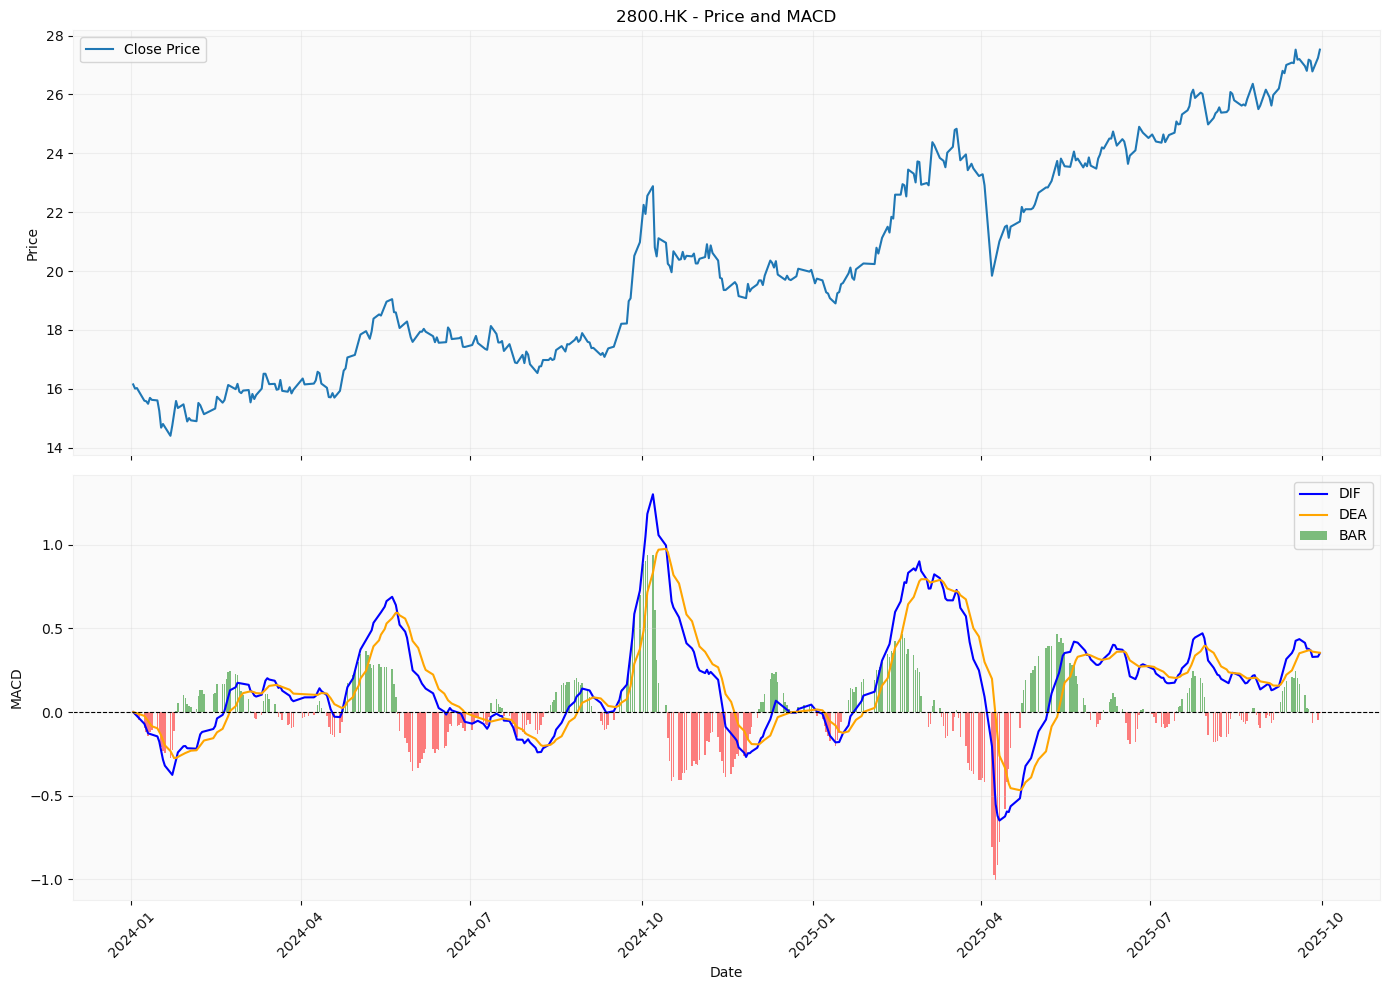

In [ ]:
# 使用 matplotlib 绘制 MACD
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(data.index, close, label='Close Price', linewidth=1.5)
ax1.set_ylabel('Price')
ax1.set_title('2800.HK - Price and MACD')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 下图：MACD 指标
ax2.plot(data.index, data['dif'], label='DIF', linewidth=1.5, color='blue')
ax2.plot(data.index, data['dea'], label='DEA', linewidth=1.5, color='orange')

# 绘制柱状图（BAR）
colors = ['red' if x < 0 else 'green' for x in data['bar']]
ax2.bar(data.index, data['bar'], label='BAR', color=colors, alpha=0.5, width=0.8)

ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()